In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
from scipy.stats import pearsonr, spearmanr, kruskal
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [17]:
# Set main directory
os.chdir('/Users/giandomenico/Documents/SAPIENZA/AR/MiC')
# set plotting settings
sns.set_theme(context='paper', style="whitegrid", palette="husl", font='arial', font_scale=1.2)

plt.rcParams.update({
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'legend.fontsize': 11
    })


In [3]:
# Load datasets
filepath = 'Rieti/Buildings/centroidi_edifici_CH_DISP_GEO_MS.shp'
data = gpd.read_file(filepath)

# cleaning based on VEL_ASC and UD_CUM coherency
data = data.drop(data[data.VEL_ASC == 0].index)

data['COD_gt'] = data['COD'].replace(['01','05','07','08'], [1,5,7,8])
data['Litologia'] = data['COD'].replace(['01','05','07','08'],
                                        ['Terreni di Riporto', 'Sabbie e Limi', 'Travertino Detritico', 'Travertino Litoide'])

## Hypotesis Testing

In [4]:
# Calculate the mean, minimum, and maximum values for each group
velocity_stats = data.groupby('Litologia')['VEL_ASC'].agg(['median', 'min', 'max', 'std']).reset_index()
ud_disp_stats = data.groupby('Litologia')['UD_CUM'].agg(['median', 'min', 'max', 'std']).reset_index()

# Calculate the correlation between displacement velocity and other geological attributes
correlation = pearsonr(data['COD_gt'], data['UD_CUM'])
print(correlation)

ordinal = 'VEL_ASC'
nominal = 'Litologia'
# ANOVA/Kruskal-Wallis test for deformation rates across different geological types
groups = [data[ordinal][data[nominal] == gt] for gt in data[nominal].unique()]
stat, p_value = kruskal(*groups)
print(f'Kruskal-Wallis test: Stat={stat}, P-value={p_value}')

PearsonRResult(statistic=0.10576261883341606, pvalue=0.2759834666525491)
Kruskal-Wallis test: Stat=39.85120898957664, P-value=1.1457641480150336e-08


##### Based on the Kruskal-Wallis test results, you can reject the null hypothesis that the medians of the velocity of displacement are the same across all geological formations. In other words, the data supports your hypothesis that the velocity of displacement is correlated with the geological formation.
##### However, it's important to note that the Kruskal-Wallis test only indicates that there are statistically significant differences between at least two groups, but it does not specify which groups are different from each other. To identify the specific groups that differ, you may need to perform post-hoc tests or pairwise comparisons.
##### Additionally, statistical significance does not necessarily imply practical or substantive significance. It's always a good practice to interpret the results in the context of your domain knowledge and the practical implications of the findings.

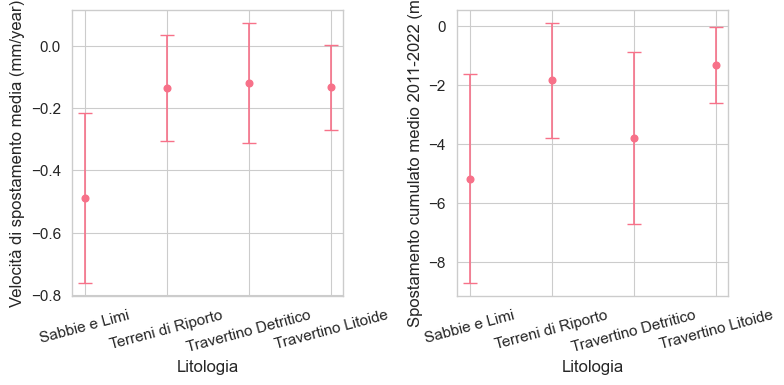

In [21]:
# Plot the scatter points with error bars
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.errorbar(velocity_stats['Litologia'], velocity_stats['median'], yerr=velocity_stats['std'], fmt='o', capsize=5)
ax2.errorbar(ud_disp_stats['Litologia'], ud_disp_stats['median'], yerr=ud_disp_stats['std'], fmt='o', capsize=5)

ax1.set_xlabel('Litologia')
ax1.set_ylabel('Velocità di spostamento media (mm/year)')
ax2.set_xlabel('Litologia')
ax2.set_ylabel('Spostamento cumulato medio 2011-2022 (mm)')

for tick in ax1.get_xticklabels():
    tick.set_rotation(15)
for tick in ax2.get_xticklabels():
    tick.set_rotation(15)
# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

plt.show()

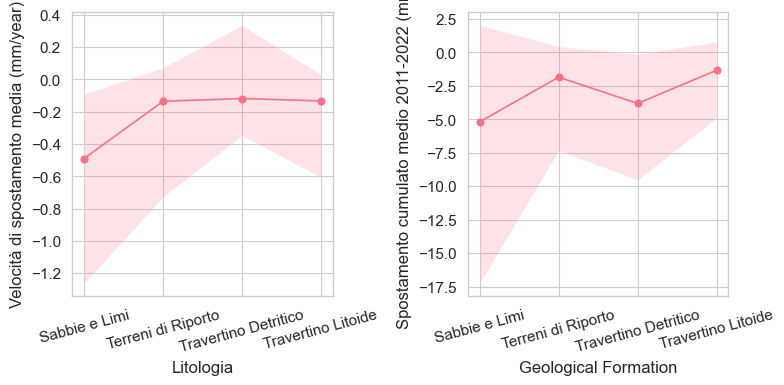

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Plot the connected scatter plots with markers
# ax1.errorbar(velocity_stats['Litologia'], velocity_stats['median'], yerr=[velocity_stats['median'] - velocity_stats['min'], velocity_stats['max'] - velocity_stats['median']], fmt='o-', capsize=5)
# ax2.errorbar(ud_disp_stats['Litologia'], ud_disp_stats['median'], yerr=[ud_disp_stats['median'] - ud_disp_stats['min'], ud_disp_stats['max'] - ud_disp_stats['median']], fmt='o-', capsize=5)

ax1.plot(velocity_stats['Litologia'], velocity_stats['median'], 'o-')
ax1.fill_between(velocity_stats['Litologia'], velocity_stats['min'], velocity_stats['max'], alpha=0.2)

ax2.plot(ud_disp_stats['Litologia'], ud_disp_stats['median'], 'o-')
ax2.fill_between(ud_disp_stats['Litologia'], ud_disp_stats['min'], ud_disp_stats['max'], alpha=0.2)

ax1.set_xlabel('Litologia')
ax1.set_ylabel('Velocità di spostamento media (mm/year)')
ax1.set_xticks(np.arange(len(velocity_stats['Litologia'])))
ax1.set_xticklabels(velocity_stats['Litologia'], rotation=15)

ax2.set_xlabel('Geological Formation')
ax2.set_ylabel('Spostamento cumulato medio 2011-2022 (mm)')
ax2.set_xticks(ud_disp_stats['Litologia'])
ax2.set_xticklabels(ud_disp_stats['Litologia'], rotation=15)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()


plt.show()

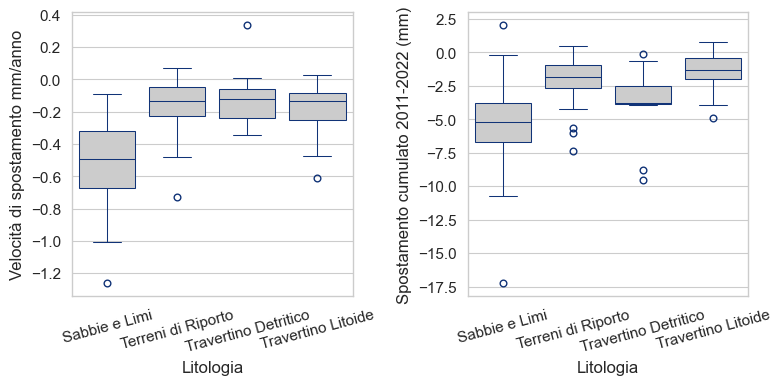

In [28]:
X = 'Litologia'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1 = sns.boxplot(data=data, x=X, y="VEL_ASC", color=".8", linecolor="#137", linewidth=.75, ax=ax1)
ax2 = sns.boxplot(data=data, x=X, y="UD_CUM", color=".8", linecolor="#137", linewidth=.75, ax=ax2)

ax1.set_xlabel("Litologia")
ax1.set_ylabel("Velocità di spostamento mm/anno")
for tick in ax1.get_xticklabels():
    tick.set_rotation(15)
    
ax2.set_xlabel("Litologia")
ax2.set_ylabel("Spostamento cumulato 2011-2022 (mm)")
for tick in ax2.get_xticklabels():
    tick.set_rotation(15)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

# Display the plot
plt.show()

## Cluster analysis

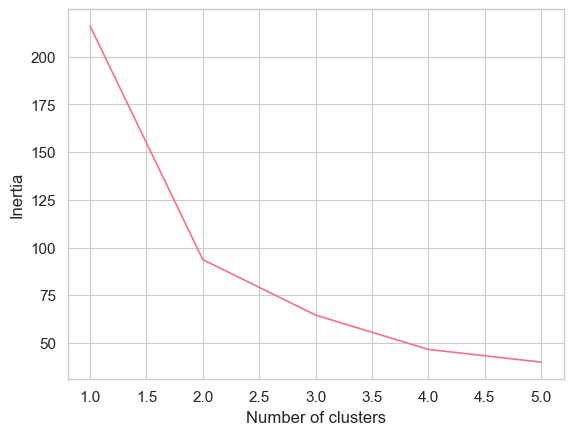

In [32]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select the relevant features
features = data[['VEL_ASC', 'UD_CUM']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters
inertia = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 6), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [36]:
# Based on the elbow plot, choose the optimal number of clusters (e.g., 2)
n_clusters = 2

# Perform K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original dataframe
data['Cluster'] = clusters

# Print the clusters
print(data.groupby('Cluster').agg({'VEL_ASC': 'mean', 'UD_CUM': 'mean', 'Litologia': 'nunique'}))

          VEL_ASC    UD_CUM  Litologia
Cluster                               
0       -0.553390 -6.457825          4
1       -0.143646 -1.567470          4


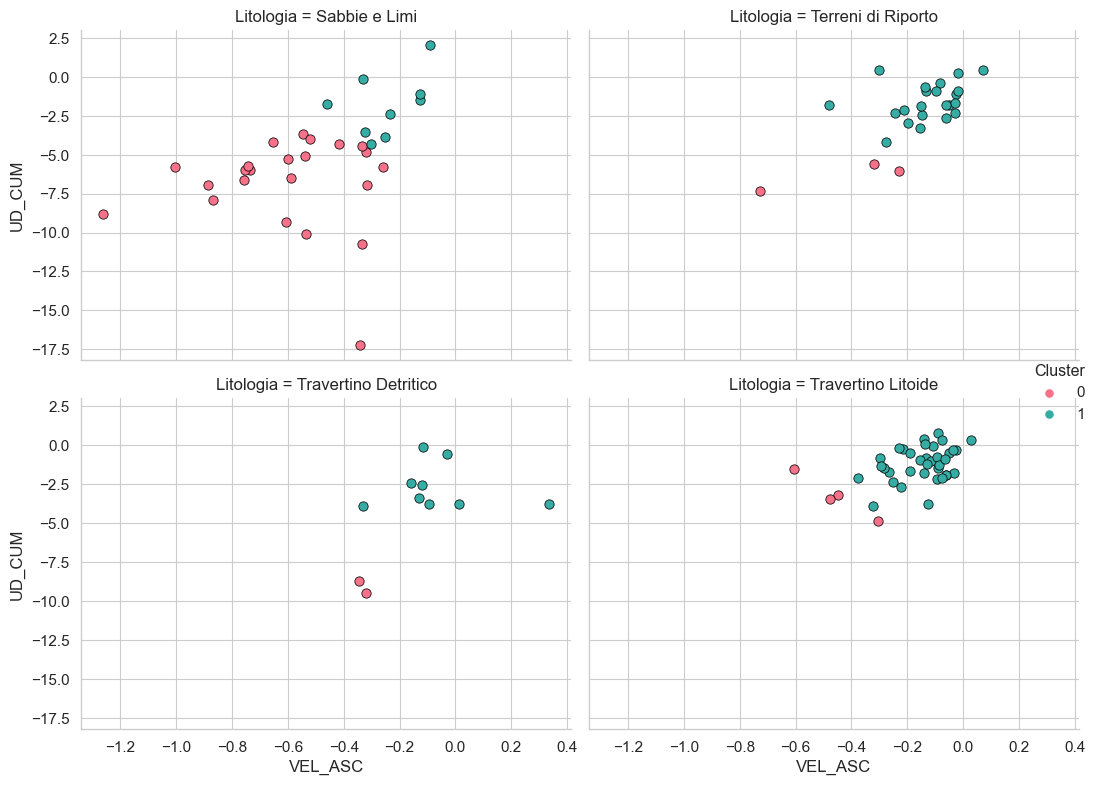

In [37]:
palette = sns.color_palette("husl", n_colors=len(data['Cluster'].unique()))

# Create scatterplot with columns based on 'Litologia' and colored by 'cluster'
g = sns.FacetGrid(data, col="Litologia", hue="Cluster", col_wrap=2, palette=palette, height=4, aspect=1.3)
g.map(sns.scatterplot, "VEL_ASC", "UD_CUM", marker="o", s=45)
g.add_legend(title="Cluster")

# Set marker edge color for all scatter points
for ax in g.axes.flat:
    for collection in ax.collections:
        if isinstance(collection, matplotlib.collections.PathCollection):
            collection.set_edgecolor("black")

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

plt.show()

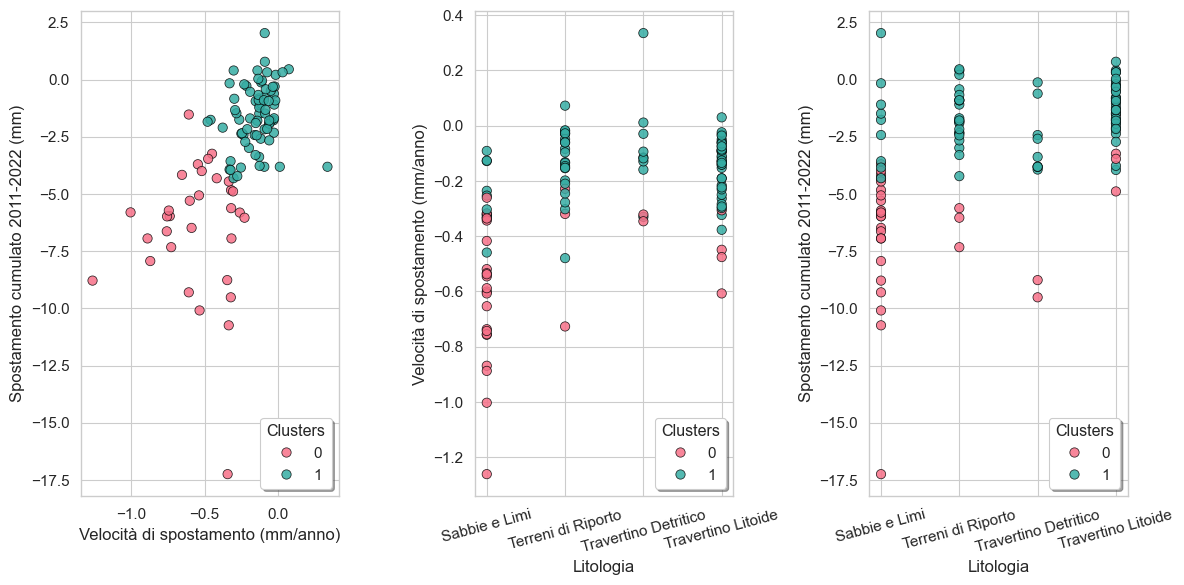

In [40]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,6))

# Plot VEL_ASC vs. UD_CUM colored by cluster
scatter1 = sns.scatterplot(x='VEL_ASC', y='UD_CUM', data=data, hue='Cluster', ax=ax1,
                           s=45, alpha=0.85, edgecolor='k', palette=palette)
# ax1.set_title('VEL_ASC vs. UD_CUM (Colored by Cluster)')
ax1.legend(bbox_to_anchor=(1, 0), loc='lower right', frameon=True, shadow=True, title='Clusters')  # Move the legend outside the plot
ax1.set_xlabel("Velocità di spostamento (mm/anno)")
ax1.set_ylabel("Spostamento cumulato 2011-2022 (mm)")

# Plot VEL_ASC vs. COD_gt colored by cluster
scatter2 = sns.scatterplot(x='Litologia', y='VEL_ASC', data=data, hue='Cluster', ax=ax2,
                           s=45, alpha=0.85, edgecolor='k', palette=palette)
# ax2.set_title('VEL_ASC vs. Litologia (Colored by Cluster)')
ax2.legend(bbox_to_anchor=(1, 0), loc='lower right', frameon=True, shadow=True, title='Clusters')  # Move the legend outside the plot
ax2.set_ylabel("Velocità di spostamento (mm/anno)")
for tick in ax2.get_xticklabels():
    tick.set_rotation(15)

scatter3 = sns.scatterplot(x='Litologia', y='UD_CUM', data=data, hue='Cluster', ax=ax3,
                           s=45, alpha=0.85, edgecolor='k', palette=palette)

# ax3.set_title('UD_CUM vs. Litologia (Colored by Cluster)')
ax3.legend(bbox_to_anchor=(1, 0), loc='lower right', frameon=True, shadow=True, title='Clusters')  # Move the legend outside the plot
ax3.set_ylabel("Spostamento cumulato 2011-2022 (mm)")
for tick in ax3.get_xticklabels():
    tick.set_rotation(15)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

# Show the plot
plt.show()